* Kernel Density Estimation (KDE) is a method for estimating the Probability Density Fucntion using a set of fininte samples
* It is close to the concept of histogram, but it converges better to the true density of the data and generates smooth curve vs discrete histogram
* KDE gets use of a kernel function and a bandwidth parameter to estimate the density at each point according to the following equation:
* $\hat{f}_h(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)$
* The value of the kernel at each point is added up to produce the final PDF curve
* Parameter h is called the bandwith and controls the smoothness of the final calculated curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

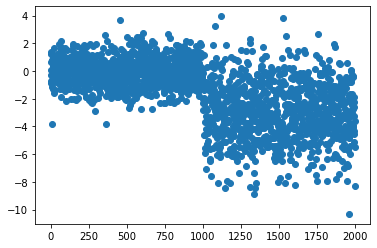

In [2]:
# generating and plotting random data

mu, sigma = 0, 1
mu2, sigma2 = -3, 2
N=1000
X1 = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)
X = np.concatenate([X1, X2])
random_data = X.reshape(-1, 1)

plt.scatter(np.arange(len(random_data)),random_data)

<BarContainer object of 100 artists>

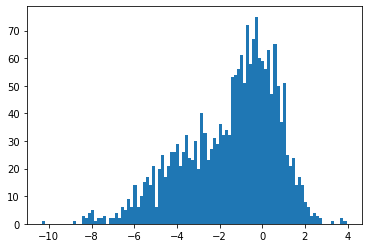

In [3]:
counts, bins, patches = plt.hist(random_data, bins=100)
patches

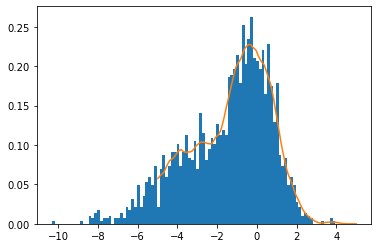

In [4]:
output =  KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit(random_data)
x_d = np.linspace(-5, 5, 1000).reshape(-1, 1)
density = np.exp(output.score_samples(x_d))
plt.hist(random_data, bins=100, density=True)
plt.plot(x_d,density)

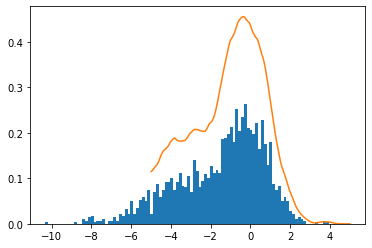

In [5]:
def Epanechnikov(x):
    return (3/4)*(1-x**2)*(np.abs(x) <= 1) 

h=0.5
def kernel_density_custom(y, samples):
    pdf=0
    for i in range(len(samples)):
        pdf+=Epanechnikov((y-samples[i])/h)
    return pdf


out = []
n=1000
points = np.linspace(-5, 5, n)
for ii in points:
    out.append((1/(n*h))*kernel_density_custom(ii, X))


plt.hist(X, bins=100, density=True)
plt.plot(points, out)